## CS102-4 - Further Computing

Prof. Götz Pfeiffer<br>
School of Mathematics, Statistics and Applied Mathematics<br>
NUI Galway

### 1. Aspects of Scientific Computing

# Week 5: Manipulating `NumPy` Arrays: Boolean Operations, Further Indexing and Sorting

* `numpy` provides efficient **storage** and **operations** for homogeneous
  multidimensional data.
* As usual, **comparison operations** yield (arrays of) **boolean** values.
* Boolean values can be combined with logical operators.
* Masking and Fancy Indexing further extend the list of indexing operations.
* `numpy` also provides effcient and versatile sorting routines.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot styles

## Example: Counting Rainy Days

* Imagine you have a series of data that represents the amount of precipitation each day for a year in a given city.
* For example, here we'll load the daily rainfall statistics for the city of Seattle in 2014, using `Pandas`:

In [2]:
# use pandas to extract rainfall inches as a NumPy array
rainfall = pd.read_csv('data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254.0  # 1/10 mm -> inches
inches.shape

(365,)

* The array contains 365 values, giving daily rainfall in inches from January 1 to December 31, 2014.


* A first quick visualization: a histogram of rainy days, generated using `Matplotlib`:

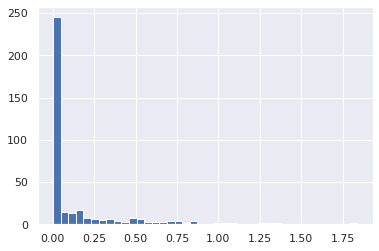

In [3]:
plt.hist(inches, 40);

* This histogram gives us a general idea of what the data looks like.
* Despite its reputation, the vast majority of days in Seattle saw near zero measured rainfall in 2014.
* But this doesn't do a good job of conveying some detailed information like:
* How many rainy days were there in the year? 
* What is the average precipitation on those rainy days? 
* How many days were there with more than half an inch of rain?
* ...

## Comparisons

* `NumPy` also implements comparison operators such as ``<`` (less than) and ``>`` (greater than) as element-wise ufuncs.
* The result of these comparison operators is always an array with a **Boolean** data type.
* All six of the standard comparison operations are available:

In [4]:
x = np.array([1, 2, 3, 4, 5])

In [5]:
x < 3  # less than

array([ True,  True, False, False, False])

In [6]:
x > 3  # greater than

array([False, False, False,  True,  True])

In [7]:
x <= 3  # less than or equal

array([ True,  True,  True, False, False])

In [8]:
x >= 3  # greater than or equal

array([False, False,  True,  True,  True])

In [9]:
x != 3  # not equal

array([ True,  True, False,  True,  True])

In [10]:
x == 3  # equal

array([False, False,  True, False, False])

* It is also possible to do an element-wise comparison of two arrays, and to include compound expressions:

In [11]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False])

* The comparison operators are implemented as ufuncs in `NumPy`.
* For example, when you write ``x < 3``, internally NumPy uses ``np.less(x, 3)``.


* A summary of the comparison operators and their equivalent ufunc is shown here:

| Operator	    | Equivalent ufunc    || Operator	   | Equivalent ufunc    |
|---------------|---------------------||---------------|---------------------|
|``==``         |``np.equal``         ||``!=``         |``np.not_equal``     |
|``<``          |``np.less``          ||``<=``         |``np.less_equal``    |
|``>``          |``np.greater``       ||``>=``         |``np.greater_equal`` |

* These ufuncs will work on arrays of any size and shape.

In [12]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [13]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

## Working with Boolean Arrays

In [14]:
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


### Counting entries

* To count the number of ``True`` entries in a Boolean array, ``np.count_nonzero`` is useful:

In [15]:
# how many values less than 6?
np.count_nonzero(x < 6)

8

* Another way to get at this information is to use ``np.sum``; in this case, ``False`` is interpreted as ``0``, and ``True`` is interpreted as ``1``:

In [16]:
np.sum(x < 6)

8

* This summation can be done along rows or columns as well:

In [17]:
# how many values less than 6 in each row?
np.sum(x < 6, axis=1)

array([4, 2, 2])

* To check whether **any or all** the values are true, use ``np.any`` or ``np.all``:

In [18]:
# are there any values greater than 8?
np.any(x > 8)

True

In [19]:
# are there any values less than zero?
np.any(x < 0)

False

In [20]:
# are all values less than 10?
np.all(x < 10)

True

In [21]:
# are all values equal to 6?
np.all(x == 6)

False

* ``np.all`` and ``np.any`` can be used along particular axes as well. For example:

In [22]:
# are all values in each row less than 8?
np.all(x < 8, axis=1)

array([ True, False,  True])

<div class="alert alert-danger">
    
**Warning:**  
* Python has built-in ``sum()``, ``any()``, and ``all()`` functions. 
* These have a different syntax and semantics than the `NumPy` versions.
* In particular. they will fail or produce unintended results when used on multidimensional arrays. 
* Be sure to use ``np.sum()``, ``np.any()``, and ``np.all()`` for `NumPy` arrays!
</div>

## Boolean operators

* What if we want to know about all days with rain less than four inches and greater than one inch?
* `Python` has **bitwise logic operators** ``&``, ``|``, ``^``, and ``~``.
* `NumPy` overloads these as ufuncs which work **element-wise** on (usually **Boolean**) arrays.

In [23]:
np.sum((inches > 0.5) & (inches < 1))

29

* The **parentheses** here are important–because of operator precedence rules,

* Using the **logical equivalence** of `A AND B` and `NOT (NOT A OR NOT B)` (DeMoivre), we can compute the same result in a different manner:

In [24]:
np.sum(~((inches <= 0.5) | (inches >= 1)))

29

* Combining comparison operators and Boolean operators on arrays can lead to a wide range of efficient logical operations.

* The following table summarizes the bitwise Boolean operators and their equivalent ufuncs:

| Operator	    | Equivalent ufunc    || Operator	   | Equivalent ufunc    |
|---------------|---------------------||---------------|---------------------|
|``&``          |``np.bitwise_and``   ||&#124;         |``np.bitwise_or``    |
|``^``          |``np.bitwise_xor``   ||``~``          |``np.bitwise_not``   |

* Using these tools, we might start to answer the types of questions we have about our weather data.
* Here are some examples of results we can compute when combining masking with aggregations:

In [25]:
print("Number days without rain:      ", np.sum(inches == 0))
print("Number days with rain:         ", np.sum(inches != 0))
print("Days with more than 0.5 inches:", np.sum(inches > 0.5))
print("Rainy days with < 0.2 inches  :", np.sum((inches > 0) & (inches < 0.2)))

Number days without rain:       215
Number days with rain:          150
Days with more than 0.5 inches: 37
Rainy days with < 0.2 inches  : 75


## Masking

* Boolean arrays can be used as **masks**, to select particular subsets of the data.


* Suppose we want an array of all values in the array `x` that are less than 5, say:

In [26]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

* Here is a Boolean array for this condition:

In [27]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

* Now to **select** the qualiying values from the array, simply index on this Boolean array.
* This is known as a **masking** operation:

In [28]:
x[x < 5]

array([0, 3, 3, 3, 2, 4])

* What is returned is a one-dimensional array filled with all the values that meet this condition; in other words, all the values in positions at which the mask array is ``True``.

* Using appropriate masks, we can compute some relevant statistics on the Seattle rain data:

In [29]:
# a mask of all rainy days
rainy = (inches > 0)

# a mask of all summer days (June 21st is the 172nd day)
days = np.arange(365)
summer = (days > 172) & (days < 262)

print("Median precip on rainy days in 2014 (inches):   ",
      np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches):  ",
      np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches): ",
      np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches):",
      np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches):    0.19488188976377951
Median precip on summer days in 2014 (inches):   0.0
Maximum precip on summer days in 2014 (inches):  0.8503937007874016
Median precip on non-summer rainy days (inches): 0.20078740157480315


* By combining Boolean operations, masking operations, and aggregates, we can very quickly answer these sorts of questions for our dataset.

## Fancy Indexing

* Fancy indexing is an extension of  the simple indexing we've already seen.
* Here we pass arrays of indices in place of a single index.
* This allows us to very quickly access and modify complicated subsets of an array's values.

In [30]:
rand = np.random.RandomState(42)
x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


* Suppose we want to access three different elements. We could do it like this:

In [31]:
[x[3], x[7], x[2]]

[71, 86, 14]

* Alternatively, using **fancy indexing**, we can pass a single list or array of indices to obtain the same result:

In [32]:
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

* The shape of the result reflects the shape of the **index arrays** rather than the shape of the array being indexed:

In [33]:
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

* Fancy indexing also works in multiple dimensions.

In [34]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

* The first index refers to the row, and the second to the column:

In [35]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

* Notice that the first value in the result is ``X[0, 2]``, the second is ``X[1, 1]``, and the third is ``X[2, 3]``.
* The pairing of indices in fancy indexing follows the **broadcasting rules**.
* So, for example, if we combine a column vector and a row vector within the indices, we get a two-dimensional result:

In [36]:
row[:, np.newaxis]

array([[0],
       [1],
       [2]])

In [37]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

* Here, each row value is matched with each column vector, exactly as in broadcasting of arithmetic operations.

In [38]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

* The return value reflects the **broadcasted shape of the indices**, rather than the shape of the array being indexed.

## Combined Indexing

* Fancy indexing can be combined with the other indexing schemes

In [39]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


* fancy and simple indices:

In [40]:
X[2, [2, 0, 1]]

array([10,  8,  9])

* fancy indexing and slicing:

In [41]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

* fancy indexing and masking:

In [42]:
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

* All of these indexing options combined lead to a very flexible set of operations for accessing and modifying array values.

## Example: Selecting Random Points

* One common use of fancy indexing is the selection of subsets of rows from a matrix.
* For example, we might have an $N$ by $D$ matrix representing $N$ points in $D$ dimensions, such as the following points drawn from a two-dimensional normal distribution:

In [43]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 200)
X.shape

(200, 2)

* Using the plotting tools from `Matplotlib`, we can visualize these points as a scatter-plot:

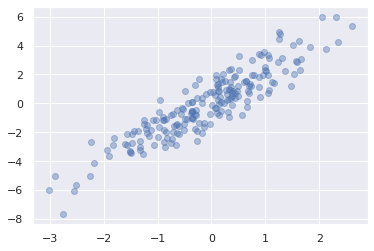

In [44]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.4);

* Let's use fancy indexing to select 10 random points. 
* We'll do this by first choosing 10 random indices with no repeats, and use these indices to select a portion of the original array:

In [45]:
indices = np.random.choice(X.shape[0], 10, replace=False)
indices

array([185,  35,   3, 189,  81,  99, 127,  36,  34,  97])

In [46]:
selection = X[indices]  # fancy indexing here
selection.shape

(10, 2)

* Now to see which points were selected, let's paint the selected points red:

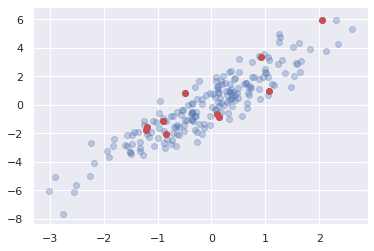

In [47]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1], facecolor='r');

* This sort of strategy is often used to quickly partition datasets, as is often needed in train/test splitting for validation of statistical models, and in sampling approaches to answering statistical questions.

## Modifying Values with Fancy Indexing

* Fancy indexing can also be used to modify parts of an array.
* For example, imagine we have an array of indices and we'd like to set the corresponding items in an array to some value:

In [48]:
x = np.arange(10)
ind = np.array([2, 1, 8, 4])
x[ind] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


* We can use any assignment-type operator for this. For example:

In [49]:
x[ind] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


## Sorting Arrays

## Fast Sorting in NumPy: ``np.sort`` and ``np.argsort``

* `Python` has built-in ``sort`` and ``sorted`` functions to work with lists.

* NumPy's ``np.sort`` function turns out to be much more efficient and useful.

* To return a sorted version of the array without modifying the input, you can use ``np.sort``:

In [50]:
x = np.array([2, 1, 4, 3, 5])
np.sort(x)

array([1, 2, 3, 4, 5])

In [51]:
x

array([2, 1, 4, 3, 5])

* If you prefer to sort the array in-place, you can instead use the ``sort`` method of arrays:

In [52]:
x.sort()
print(x)

[1 2 3 4 5]


* A related function is ``argsort``, which instead returns the *indices* of the sorted elements:

In [53]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(i)

[1 0 3 2 4]


* The first element of this result gives the index of the smallest element, the second value gives the index of the second smallest, and so on.
* These indices can then be used (via fancy indexing) to construct the sorted array if desired:

In [54]:
x[i]

array([1, 2, 3, 4, 5])

### Sorting along rows or columns

* A useful feature of NumPy's sorting algorithms is the ability to sort along specific rows or columns of a multidimensional array using the ``axis`` argument:

In [55]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [56]:
# sort each column of X
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [57]:
# sort each row of X
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

* Keep in mind that this treats each row or column as an independent array, and any relationships between the row or column values will be lost!

## Example: k-Nearest Neighbors

* Let's quickly see how we might use this ``argsort`` function along multiple axes to find the nearest neighbors of each point in a set.
* We'll start by creating a random set of 50 points on a two-dimensional plane.
* Using the standard convention, we'll arrange these in a $50\times 2$ array:

In [58]:
X = rand.rand(50, 2)

* To get an idea of how these points look, let's quickly scatter plot them:

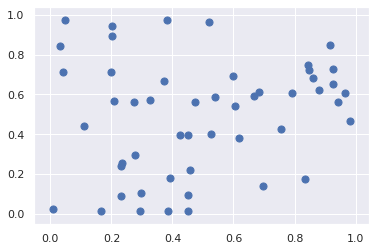

In [59]:
plt.scatter(X[:, 0], X[:, 1], s=50);

* Now we'll compute the distance between each pair of points.
* Recall that the squared-distance between two points is the sum of the squared differences in each dimension;
* Using the efficient broadcasting  and aggregation routines provided by `NumPy` we can compute the matrix of square distances in a single line of code:

In [60]:
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1)

* Just to double-check what we are doing, we should see that the diagonal of this matrix (i.e., the set of distances between each point and itself) is all zero:

In [61]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

* It checks out!
* With the pairwise square-distances converted, we can now use ``np.argsort`` to sort along each row.
* The leftmost columns will then give the indices of the nearest neighbors:

In [62]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[ 0 25  3 ... 23 18 31]
 [ 1 17  4 ...  0 16  2]
 [ 2 16 45 ... 43  5 12]
 ...
 [47 30  6 ...  2 25  0]
 [48  3 27 ... 18  2 31]
 [49 13 32 ... 45 31  2]]


* Notice that the first column gives the numbers 0 through 49 in order: this is due to the fact that each point's closest neighbor is itself, as we would expect.

* In order to visualize this network of neighbors, let's quickly plot the points along with lines representing the connections from each point to its two nearest neighbors:

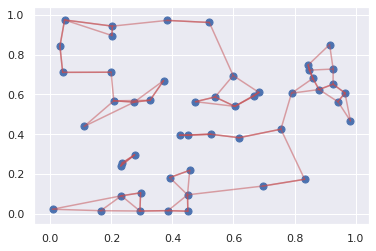

In [63]:
plt.scatter(X[:, 0], X[:, 1], s=50)

# draw lines from each point to its two nearest neighbors
K = 2
for i in range(X.shape[0]):
    for j in nearest[i, :K+1]:
        # plot a line from X[i] to X[j]
        plt.plot(*zip(X[j], X[i]), color='r', alpha=0.5)

* ...

## References

* UFuncs [[doc]](https://docs.scipy.org/doc/numpy/reference/ufuncs.html)

## Exercises